In [2]:
import pandas as pd

In [3]:
import sklearn.datasets as sk

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits

In [4]:
dg=sk.load_digits()

In [5]:
type(dg)

sklearn.utils.Bunch

In [6]:
import matplotlib.pyplot as plt

In [7]:
plt.gray()

<Figure size 600x400 with 0 Axes>

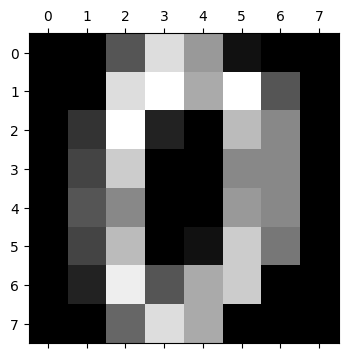

In [8]:
%matplotlib inline
plt.matshow(dg.images[0])

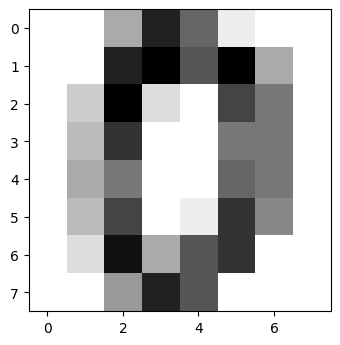

In [28]:
data = load_digits()
features= pd.DataFrame(data['data'])
labels = pd.Series(data['target'])

first_image = features.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)

plt.imshow(np_image, cmap='gray_r')
plt.show()

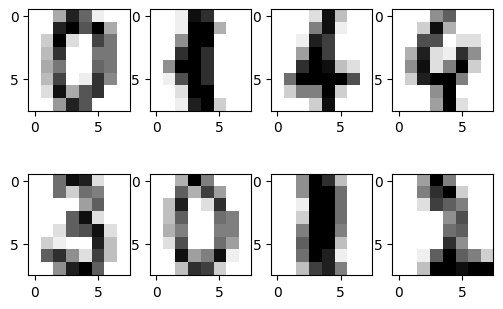

In [29]:
f, ax = plt.subplots(2,4)
for a in range(4):
    ax[0,a].imshow(features.iloc[0+99*a].values.reshape(8,8), cmap='gray_r')
for a in range(4):
    ax[1,a].imshow(features.iloc[999+100*a].values.reshape(8,8), cmap='gray_r')

In [30]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

def train(neighbors, features, labels):
    model = KNeighborsClassifier(n_neighbors = neighbors)
    model.fit(features, labels)
    return model

def test(model, features, labels):
    predictions = model.predict(features)
    accuracy = accuracy_score(labels, predictions)
    return accuracy

def cross_validate(neighbors, features, labels):
    kf = KFold(n_splits=4)
    kf.get_n_splits(features)
    for train_index, test_index in kf.split(features):
        X_train, X_test = features.loc[train_index], features.loc[test_index]
        y_train, y_test = labels.loc[train_index], labels.loc[test_index]
        model = train(neighbors, X_train, y_train)
        accuracy = test(model, X_test, y_test)
    return accuracy

In [31]:
accuracies=[]
for a in range(1,51):
    accuracies.append(cross_validate(a,features,labels))

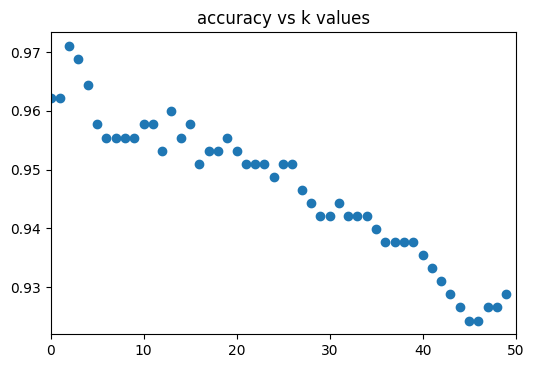

In [32]:
plt.scatter(x= range(len(accuracies)),y = accuracies)
plt.xlim(0,50)
plt.title('accuracy vs k values')
plt.show()

In [33]:
from sklearn.neural_network import MLPClassifier
def mlp_train(neurons, features, labels):
    model = MLPClassifier(hidden_layer_sizes=(neurons), activation = 'relu')
    model.fit(features, labels)
    return model

def test(model, features, labels):
    predictions = model.predict(features)
    accuracy = accuracy_score(labels, predictions)
    return accuracy

def mlp_cross_validate(neurons, features, labels):
    kf = KFold(n_splits=4)
    kf.get_n_splits(features)
    for train_index, test_index in kf.split(features):
        X_train, X_test = features.loc[train_index], features.loc[test_index]
        y_train, y_test = labels.loc[train_index], labels.loc[test_index]
        model = mlp_train(neurons, X_train, y_train)
        accuracy = test(model, X_test, y_test)
    return accuracy

In [ ]:
mlp_accuracies= []
for a in [8,16,32,64,128,256]:
    mlp_cross_validate(a, features, labels)

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/dataquest/s

In [26]:
plt.scatter(x= range(len(mlp_accuracies)),y = mlp_accuracies)
plt.xlim(0,50)
plt.title('accuracy vs k values')
plt.show()